In [2]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## BUSINESS PROBLEM-1
BACKGROUND: The Lending Club is a peer-to-peer lending site where members make loans to
each other. The site makes anonymized data on loans and borrowers publicly available.
BUSINESS PROBLEM:
Using lending club loans data, the team would like to test below hypothesis on how different
factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)

a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan
amounts)

b. Loan length is directly effecting intrest rate.

c. Inrest rate varies for different purpose of loans

d. There is relationship between FICO scores and Home Ownership. It means that, People
with owning home will have high FICO scores.


In [7]:
loansdata = pd.read_csv(r"C:\Users\kirti\OneDrive\Desktop\Python Excel files\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\LoansData.csv")

In [9]:
loansdata

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.00,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.00,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.00,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.00,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.00,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,30000.0,29950.00,16.77%,60 months,debt_consolidation,19.23%,NY,MORTGAGE,9250.00,705-709,15.0,45880.0,1.0,8 years
2496,16000.0,16000.00,14.09%,60 months,home_improvement,21.54%,MD,OWN,8903.25,740-744,18.0,18898.0,1.0,10+ years
2497,10000.0,10000.00,13.99%,36 months,debt_consolidation,4.89%,PA,MORTGAGE,2166.67,680-684,4.0,4544.0,0.0,10+ years
2498,6000.0,6000.00,12.42%,36 months,major_purchase,16.66%,NJ,RENT,3500.00,675-679,8.0,7753.0,0.0,5 years


In [10]:
loansdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

In [11]:
loansdata.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [12]:
categ_col = ['Interest.Rate','Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State','Home.Ownership',
                   'FICO.Range', 'Open.CREDIT.Lines','Inquiries.in.the.Last.6.Months', 'Employment.Length' ]
continuous_col = ['Amount.Requested', 'Amount.Funded.By.Investors', 'Monthly.Income','Revolving.CREDIT.Balance']

In [19]:
for col in categ_col:
    loansdata[col] = loansdata[col].fillna(loansdata[col].mode()[0])
loansdata[continuous_col] = loansdata[continuous_col].fillna(loansdata[continuous_col].mean())
loansdata.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [20]:
loansdata.isna().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

In [25]:
loansdata['Amount.Requested'].value_counts()

Amount.Requested
10000.0    206
12000.0    151
5000.0     110
20000.0    107
6000.0     103
          ... 
1675.0       1
16550.0      1
31075.0      1
9550.0       1
8475.0       1
Name: count, Length: 381, dtype: int64

In [27]:
loansdata['Interest.Rate'].value_counts()

Interest.Rate
12.12%    124
7.90%     119
13.11%    115
15.31%     76
14.09%     72
         ... 
11.09%      1
23.33%      1
14.18%      1
18.62%      1
19.04%      1
Name: count, Length: 275, dtype: int64

In [31]:
loansdata['Interest.Rate'] = (loansdata['Interest.Rate'].str[:-1].astype(float))

In [32]:
stats.pearsonr( loansdata['Interest.Rate'], loansdata['Amount.Requested'] )

PearsonRResult(statistic=0.33240946119905634, pvalue=1.4646809963097598e-65)

Conclusion: We reject H0 - No relationship between Interest rate and loan amount as p-value is very less Ha - There is a relationship among the variables with 95% accuracy Hence Intrest rate is varied for different loan amounts

## b. Loan length is directly effecting intrest rate.

In [35]:
loansdata.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [37]:
loansdata['Loan.Length'].value_counts()

Loan.Length
36 months    1952
60 months     548
Name: count, dtype: int64

## 
1)Null Hypothesis : There is no significant difference in interest rates among the loan length groups.
2)Alternative Hypothesis : There is a significant difference in interest rates among the loan length groups.
3) Significance level = 0.05


In [38]:
## Here we will perform Anova test

In [39]:
var='Interest.Rate'
s1 = loansdata.loc[ loansdata['Loan.Length'] == '36 months', var ]
s2 = loansdata.loc[ loansdata['Loan.Length'] == '60 months', var ]

In [40]:
stats.f_oneway(s1,s2)

F_onewayResult(statistic=548.3261736091927, pvalue=8.529143234124184e-110)

In [42]:
# Compare p-value with significance level
p_value=8.529143234124184e-110
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in interest rates among loan length groups.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in interest rates among loan length groups.")

Reject the null hypothesis. There is a significant difference in interest rates among loan length groups.


## c. Inrest rate varies for different purpose of loans

Null Hypothesis :There is no significant difference in interest rates among different loan purposes.
Alternative Hypothesis: There is a significant difference in interest rates among different loan purposes.
Significance level = 0.05

In [44]:
obs_freq = pd.crosstab( loansdata['Interest.Rate'], loansdata['Loan.Purpose'] )

In [46]:
obs_freq

Loan.Purpose,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
Interest.Rate,,,,,,,,,,,,,,
5.42,0,2,0,0,5,0,1,1,0,0,0,0,1,1
5.79,1,2,5,0,2,0,1,0,1,1,0,1,0,0
5.99,0,1,4,0,3,1,1,0,0,0,0,0,0,0
6.00,0,0,0,0,1,0,0,0,0,0,0,0,0,0
6.03,3,7,24,0,5,1,6,2,0,4,0,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23.91,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24.20,0,0,1,0,0,0,0,0,0,0,0,0,0,0
24.33,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [47]:
stats.chi2_contingency( obs_freq )

Chi2ContingencyResult(statistic=4378.952129804514, pvalue=8.396099408489274e-20, dof=3562, expected_freq=array([[0.22  , 1.9536, 5.7508, ..., 0.3828, 0.0924, 0.1716],
       [0.28  , 2.4864, 7.3192, ..., 0.4872, 0.1176, 0.2184],
       [0.2   , 1.776 , 5.228 , ..., 0.348 , 0.084 , 0.156 ],
       ...,
       [0.02  , 0.1776, 0.5228, ..., 0.0348, 0.0084, 0.0156],
       [0.04  , 0.3552, 1.0456, ..., 0.0696, 0.0168, 0.0312],
       [0.04  , 0.3552, 1.0456, ..., 0.0696, 0.0168, 0.0312]]))

In [48]:
# Compare p-value with significance level
p_value=8.396099408489274e-20
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in interest rates among different loan purposes..")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in interest rates among loan length groups.")

Reject the null hypothesis. There is a significant difference in interest rates among different loan purposes..


## d. There is relationship between FICO scores and Home Ownership. It means that, People with owning home will have high FICO scores.

Null Hypothesis: There is no significant difference in FICO scores between people who own homes and those who do not.
Alternative Hypothesis: There is a significant difference in FICO scores between people who own homes and those who do not.
alpha = 0.05

In [50]:
obs_freq_1 = pd.crosstab( loansdata['Home.Ownership'], loansdata['FICO.Range'] )

In [52]:
obs_freq_1.T

Home.Ownership,MORTGAGE,NONE,OTHER,OWN,RENT
FICO.Range,,,,,
640-644,0,0,0,1,4
645-649,1,0,0,0,2
650-654,1,0,0,0,0
655-659,0,0,1,0,3
660-664,41,0,0,17,67
665-669,52,0,0,18,75
670-674,68,0,1,13,91
675-679,79,0,1,11,75
680-684,55,0,2,9,91


In [53]:
stats.chi2_contingency( obs_freq_1.T )

Chi2ContingencyResult(statistic=473.564802816852, pvalue=1.0065160858472195e-35, dof=148, expected_freq=array([[2.29600e+00, 2.00000e-03, 1.00000e-02, 4.00000e-01, 2.29200e+00],
       [1.37760e+00, 1.20000e-03, 6.00000e-03, 2.40000e-01, 1.37520e+00],
       [4.59200e-01, 4.00000e-04, 2.00000e-03, 8.00000e-02, 4.58400e-01],
       [1.83680e+00, 1.60000e-03, 8.00000e-03, 3.20000e-01, 1.83360e+00],
       [5.74000e+01, 5.00000e-02, 2.50000e-01, 1.00000e+01, 5.73000e+01],
       [6.65840e+01, 5.80000e-02, 2.90000e-01, 1.16000e+01, 6.64680e+01],
       [7.94416e+01, 6.92000e-02, 3.46000e-01, 1.38400e+01, 7.93032e+01],
       [7.62272e+01, 6.64000e-02, 3.32000e-01, 1.32800e+01, 7.60944e+01],
       [7.20944e+01, 6.28000e-02, 3.14000e-01, 1.25600e+01, 7.19688e+01],
       [6.24512e+01, 5.44000e-02, 2.72000e-01, 1.08800e+01, 6.23424e+01],
       [6.42880e+01, 5.60000e-02, 2.80000e-01, 1.12000e+01, 6.41760e+01],
       [7.02576e+01, 6.12000e-02, 3.06000e-01, 1.22400e+01, 7.01352e+01],
       [

In [54]:
pvalue=1.0065160858472195e-35
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in FICO scores between people who own homes and those who do not")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in  in FICO scores between people who own homes and those who do not.")


Reject the null hypothesis. There is a significant difference in FICO scores between people who own homes and those who do not


## BUSINESS PROBLEM - 2

BACKGROUND: When an order is placed by a customer of a small manufacturing company, a
price quote must be developed for that order. Because each order is unique, quotes must be
established on an order-by-order basis by a pricing expert. The price quote process is laborintensive,
as prices depend on many factors such as the part number, customer, geographic
location, market, and order volume. The sales department manager is concerned that the pricing
process is too complex, and that there might be too much variability in the quoted prices. An
improvement team is tasked with studying and improving the pricing process.
After interviewing experts to develop a better understanding of the current process, the team
designed a study to determine if there is variability between pricing experts. That is, do different
pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and
Barry, were asked to independently provide prices for twelve randomly selected orders. Each
expert provided one price for each of the twelve orders.

                         
## BUSINESS PROBLEM:
We would like to assess if there is any difference in the average
price quotes provided by Mary and Barry.

## DATA AVAILABLE:##  Price_Quotes.csv
The data set contains the order number, 1 through 12, and the price quotes by Mary
and Barry for each order. Each row in the data set is the same order. Thus, Mary and
Barry produced quotes for the same orders.

    

In [57]:
Price_Quotes= pd.read_csv(r"C:\Users\kirti\OneDrive\Desktop\Python Excel files\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Price_Quotes.csv")

In [58]:
Price_Quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


 Null Hypothesis : There is no significant difference in prices quoted by Mary and Barry.

Alternative Hypothesis: There is a significant difference in prices quoted by Mary and Barry.

alpha = 0.05

In [60]:
mary_quotes = Price_Quotes['Mary_Price']
barry_quotes = Price_Quotes['Barry_Price']

In [61]:
stats.ttest_rel( Price_Quotes.Barry_Price, Price_Quotes.Mary_Price )

TtestResult(statistic=2.5213765108923494, pvalue=0.02840588045242053, df=11)

In [62]:
pvalue = 0.02840588045242053
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in prices quoted by Mary and Barry.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in prices quoted by Mary and Barry.")

Reject the null hypothesis. There is a significant difference in prices quoted by Mary and Barry.


## BUSINESS PROBLEM-3:

BACKGROUND: The New Life Residential Treatment Facility is a NGO that treats teenagers who
have shown signs of mental illness. It provides housing and supervision of teenagers who are
making the transition from psychiatric hospitals back into the community. Because many of
the teenagers were severely abused as children and have been involved with the juvenile
justice system, behavioral problems are common at New Life. Employee pay is low and staff
turnover (attrition) is high.
A reengineering program was instituted at New Life with the goals of lowering behavioral
problems of the kids and decreasing employee turnover rates. As a part of this effort, the
following changes were made:

 Employee shifts were shortened from 10 hours to 8 hours each day.
    
 Employees were motivated to become more involved in patient treatments. This
included encouraging staff to run various therapeutic treatment sessions and allowing
staff to have more say in program changes.
    
 The activities budget was increased.

 A facility-wide performance evaluation system was put into place that rewarded staff
participation and innovation.

 Management and staff instituted a program designed to raise expectations about
appropriate behavior from the kids. This included strict compliance with reporting of
behavioral violations, insistence on participation in therapeutic sessions, and a
lowered tolerance for even moderate behavioral infractions.

To determine the effectiveness of the reengineering effort, a data set comprised of pre- and
post-reengineering periods was compiled. The information contains two measures of
behavioral problems. A critical incident occurs when a resident goes AWOL (leaves the
premises without permission), destroys property (e.g., punching a hole in a wall or throwing
furniture through windows), is caught in possession of street drugs, or engages in assault
against other residents or staff members. A teenager is temporarily removed from the facility
when s/he is sent to jail or back to a psychiatric hospital


## BUSINESS PROBLEM:
Determine what effect, if any, the reengineering effort had on the
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Is there evidence that the critical incidence rate
improved?

## DATA AVAILABLE:
Price_Quotes.csv
The data set contains 20 months of data; the first 13 months were prior to reengineering. The
variables in the data includ
e:
 Reengineer: Whether the month was before (Prior) or after (Post) reengineer
ing
 Employee Turnover: The percentage of employees who quit in a given
month, out of the total number of empl
oyees
 TRFF(%): The percentage of residents who were temporarily removed from
the facility, out of the total number of re
sidents
 CI (%): The percentage of critical incident reports written that month, out of
the total number of residents

In [64]:
Treatment_Facility = pd.read_csv(r"C:\Users\kirti\OneDrive\Desktop\Python Excel files\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Treatment_Facility.csv")

In [65]:
Treatment_Facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [66]:
Treatment_Facility.rename(columns = {'VAR4':'TRFF', 'VAR5':'CI'}, inplace = True)

In [68]:
Treatment_Facility.head()

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


## 1) To test weather the reengineering effort had on the staff turnover


## Hypotheses:

Null Hypothesis:There is no significant difference in turnover rates before and after reengineering.

Alternative Hypothesis : There is a significant difference in turnover rates before and after reengineering.

In [70]:
var = 'Employee_Turnover'

Prior_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Prior', var ]
Post_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Post', var ]

In [71]:
stats.f_oneway(Prior_Reengineer,Post_Reengineer)

F_onewayResult(statistic=3.133985828895568, pvalue=0.09361109345535291)

In [72]:
p_value =0.09361109345535291
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in turnover rates before and after reengineering.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in turnover rates before and after reengineering.")

Fail to reject the null hypothesis. There is no significant difference in turnover rates before and after reengineering.


## 2) To test weather the reengineering effort chnaged the critical incidence rate

## Hypotheses:

Null Hypothesis:There is no significant difference in critical incidence rates before and after reengineering.

Alternative Hypothesis : There is a significant difference in  critical incidence rates before and after reengineering.

In [74]:
var = 'CI'

Prior_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Prior', var ]
Post_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Post', var ]

In [75]:
stats.f_oneway(Prior_Reengineer,Post_Reengineer)

F_onewayResult(statistic=2.650105376271948, pvalue=0.12091989189884142)

In [78]:
p_value= 0.12091989189884142
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in  critical incidence  rates before and after reengineering.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in  critical incidence rates before and after reengineering.")

Fail to reject the null hypothesis. There is no significant difference in  critical incidence rates before and after reengineering.


## BUSINESS PROBLEM-4

BACKGROUND: Software development projects typically follow six basic phases: Requirements,
design, implementation (and integration), testing (validation), deployment (installation) and
maintenance. First, general requirements are gathered, and the scope of the functionality is
defined. Then, alternative scenarios for the required functionality are developed and
evaluated. Implementation, usually 50% or more of the development time, is the phase in
which the design is translated into programs and integrated with other parts of the software –
this is when software engineers actually develop the code. During the final phases, programs
are tested, software is put into use, and faults or performance issues are addressed.
ApDudes, a developer of applications for tablet computers, was having difficulty meeting
project deadlines; only 10% of their projects had been completed within budget and on time
last year and that was starting to hurt business. The group’s project manager was tasked with
studying problems within the implementation phase. He found that software engineers were
having difficulty prioritizing their work, and that they often became overwhelmed by the
magnitude of the projects.
As a result, two changes were made. Each project was broken down into smaller, distinct
tasks, or jobs, and each job was assigned a priority. The project manager believes that this
classification and prioritization system would speed the completion of high priority jobs, and
thus lower overall project completion time


## BUSINESS PROBLEM:
We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether this is, in fact, occurring.


## DATA AVAILABLE:
 Priority_Assessment.csv
The data set contains a random sample of 642 jobs completed over the last six months. The
variables in the data set are:
Days The number of days it took to complete the job
Priority The priority level assigned to that job

In [81]:
Priority_Assessment = pd.read_csv(r"C:\Users\kirti\OneDrive\Desktop\Python Excel files\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Priority_Assessment.csv")

In [88]:
Priority_Assessment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 642 entries, 0 to 641
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Days      642 non-null    float64
 1   Priority  642 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


In [90]:
Priority_Assessment.isna().sum()

Days        0
Priority    0
dtype: int64

In [83]:
Priority_Assessment.Priority.value_counts()

Priority
High      326
Medium    249
Low        67
Name: count, dtype: int64

In [84]:
Priority_Assessment.Priority.nunique()

3

## Hypotheses:
Null Hypothesis:There is no significant difference in prioritization system implemented

Alternative Hypothesis : There is a significant difference in prioritization system implemented


In [85]:
days = 'Days'

High_Priority = Priority_Assessment.loc[ Priority_Assessment.Priority == 'High', days ]
Medium_Priority = Priority_Assessment.loc[ Priority_Assessment.Priority == 'Medium', days ]
Low_Priority = Priority_Assessment.loc[ Priority_Assessment.Priority == 'Low', days ]



In [86]:
stats.f_oneway( High_Priority, Medium_Priority, Low_Priority )

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

In [87]:
p_value= 0.16411459461716182
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in prioritization system implemented  ")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in prioritization system implemented")



Fail to reject the null hypothesis. There is no significant difference in prioritization system implemented


## BUSINESS PROBLEM-5
BackGround: Film on the Rocks is a summer movie series held at the world-renowned Red
Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison,
Colorado fifteen miles west of Denver. The film series features classic films, and pre-show
entertainment including bands and comedians. Among the features that have made Red Rocks
an internationally-famous concert stage are sweeping views of Denver, outstanding acoustics,
and cool, dry Colorado summers.
    
The series is jointly promoted by the Denver Film Society (DFS) and the City and County of
Denver’s Division of Theatres and Arenas (DT&A). It is marketed through various outlets
including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the
Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and
banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate
funds that keep ticket prices low.

Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue,
there are tradeoffs. Red Rocks is a farther commute for most people than the local movie
theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot,
getting there can be challenging. And, as an outdoor venue, the viewing experience is
dependent on the weather.
    
Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But,
the series promoters would also like to increase attendance at the film series, and are unsure
how to do this. Promoters recognize that they need a better understanding of the customer
base, and of the current level of satisfaction. Knowing the demographics of those who attend
the film series will help attract and expand corporate sponsorship. In addition, knowing which
media outlets are most effective will provideinformation about how best to target future
marketing campaigns.
                                                                                                   
To this end, the promoters conducted surveys during a recent Film on the Rocks season.
Questionnaires were handed out at the entrance. Volunteers walked through the crowd to
remind people about the free soft drink given to those who returned the survey.
                                                                                                   
## BUSINESS PROBLEM:
Use the survey results to address the following questions
 What is the overall level of customer satisfaction?
 What factors are linked to satisfaction?
 What is the demographic profile of Film on the Rocks patrons?
 In what media outlet(s) should the film series be advertised?


## DATA AVAILABLE: Data provided by the Denver Film Society
 Films.csv
The data set contains 330 surveys collected during three Film on the Rocks movies:
Ferris Bueller’s Day Off, Old School, and Willy Wonka and the Chocolate Factory.
The variables are:

In [92]:
Films = pd.read_csv(r"C:\Users\kirti\OneDrive\Desktop\Python Excel files\Basic Statistics - Hypothesis Testing\4. Basic Statistics - Hypothesis Testing\Films.csv")

In [99]:
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


In [100]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [101]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [102]:
## Missing Value treatment

In [103]:

Films['Hear_About'] = Films['Hear_About'].fillna(Films['Hear_About'].mode()[0])
Films['Sinage'] = Films['Sinage'].fillna(Films['Sinage'].mode()[0])
Films['Parking'] = Films['Parking'].fillna(Films['Parking'].mode()[0])
Films['Clean'] = Films['Clean'].fillna(Films['Clean'].mode()[0])
Films['Overall'] = Films['Overall'].fillna(Films['Overall'].mode()[0])
Films['Income'] = Films['Income'].fillna(Films['Income'].mean())
Films['Age'] = Films['Age'].fillna(Films['Age'].mode()[0])

In [104]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    2
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [118]:
Films = Films.drop('_rowstate_', axis = 1)

In [106]:
Films.Movie.value_counts()

Movie
Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: count, dtype: int64

## 1 What is the overall level of customer satisfaction?

In [114]:
mean_satisfaction = Films['Overall'].mean()
median_satisfaction =  Films['Overall'].median()
print(f"Mean Satisfaction: {mean_satisfaction}")
print(f"Median Satisfaction: {median_satisfaction}")



Mean Satisfaction: 1.621212121212121
Median Satisfaction: 2.0


In [113]:
Conclusion : Based on the result the customers satisfaction is between excellent and good

2.0

## 2 What factors are linked to satisfaction?

In [155]:
Correlation_matrix = Films.iloc[:,3:9].corr()
Correlation_matrix

,Sinage,Parking,Clean,Overall,Age,Income
Sinage,1.000000,0.469180,0.349144,0.382103,-0.089461,-0.036968
Parking,0.469180,1.000000,0.440771,0.514429,-0.023468,-0.023575
Clean,0.349144,0.440771,1.000000,0.350822,-0.000114,0.016643
Overall,0.382103,0.514429,0.350822,1.000000,-0.032904,-0.005568
Age,-0.089461,-0.023468,-0.000114,-0.032904,1.000000,0.136119
Income,-0.036968,-0.023575,0.016643,-0.005568,0.136119,1.000000


<Axes: >

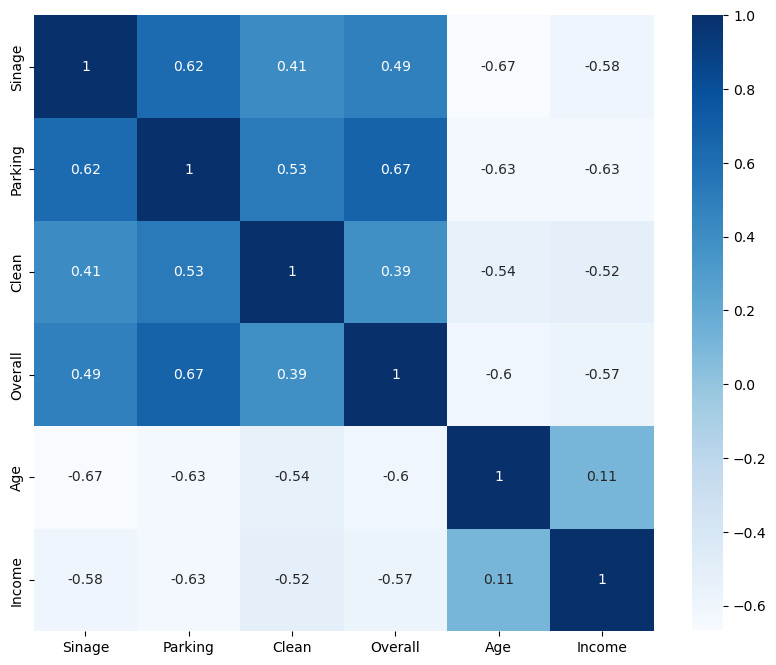

In [154]:
plt.figure(figsize = (10, 8))
sns.heatmap(Films1.corr(), cmap= "Blues", annot = True)

Conclusion =  From the result above we can say that parking is somewhat an important factor in overall satisfaction

In [157]:
Films.Gender.unique()

array(['Female', 'Male', '2', '1'], dtype=object)

In [159]:
Films['Gender'].replace({'Male': 1, 'Female': 2, '1': 1, '2': 2}, inplace=True)


In [160]:
Films.Gender.unique()

array([2, 1], dtype=int64)

## Checking Realtionship between overall satifaction and all the variables

Hypothesis

Null Hypothesis:There is no relationship between Age and Overall Satisfaction
Alternative Hypothesis : There is a relationship between Age and Overall Satisfaction
alpha = 0.05

In [162]:
obs_freq0 = pd.crosstab( Films.Age, Films.Overall )

In [163]:
stats.chi2_contingency( obs_freq0 )

Chi2ContingencyResult(statistic=10.45278328792503, pvalue=0.5763025800406916, dof=12, expected_freq=array([[1.18969697e+01, 1.27636364e+01, 9.45454545e-01, 7.87878788e-02,
        3.15151515e-01],
       [8.09909091e+01, 8.68909091e+01, 6.43636364e+00, 5.36363636e-01,
        2.14545455e+00],
       [5.35363636e+01, 5.74363636e+01, 4.25454545e+00, 3.54545455e-01,
        1.41818182e+00],
       [4.57575758e+00, 4.90909091e+00, 3.63636364e-01, 3.03030303e-02,
        1.21212121e-01]]))

In [167]:
## Conclusion: Since p value is greater than alpha we do not reject the null hypothesis and hence there is a no relationship between age and overall satisfaction

In [169]:
obs_freq1 = pd.crosstab( Films.Gender, Films.Overall )

In [170]:
stats.chi2_contingency( obs_freq1 )

Chi2ContingencyResult(statistic=4.325375175990271, pvalue=0.36375838131773974, dof=4, expected_freq=array([[ 53.53636364,  57.43636364,   4.25454545,   0.35454545,
          1.41818182],
       [ 97.46363636, 104.56363636,   7.74545455,   0.64545455,
          2.58181818]]))

In [171]:
obs_freq3 = pd.crosstab( Films.Income, Films.Overall )

In [172]:
stats.chi2_contingency( obs_freq3)

Chi2ContingencyResult(statistic=9.987707990264004, pvalue=0.6170390767831415, dof=12, expected_freq=array([[6.49757576e+01, 6.97090909e+01, 5.16363636e+00, 4.30303030e-01,
        1.72121212e+00],
       [7.32121212e+00, 7.85454545e+00, 5.81818182e-01, 4.84848485e-02,
        1.93939394e-01],
       [3.75212121e+01, 4.02545455e+01, 2.98181818e+00, 2.48484848e-01,
        9.93939394e-01],
       [4.11818182e+01, 4.41818182e+01, 3.27272727e+00, 2.72727273e-01,
        1.09090909e+00]]))

In [175]:
obs_freq4 = pd.crosstab( Films.Clean, Films.Overall )

In [176]:
stats.chi2_contingency( obs_freq4)

Chi2ContingencyResult(statistic=127.71945555999517, pvalue=1.7772535915434025e-19, dof=16, expected_freq=array([[6.58909091e+01, 7.06909091e+01, 5.23636364e+00, 4.36363636e-01,
        1.74545455e+00],
       [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
        1.87878788e+00],
       [1.09818182e+01, 1.17818182e+01, 8.72727273e-01, 7.27272727e-02,
        2.90909091e-01],
       [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
        6.06060606e-02],
       [9.15151515e-01, 9.81818182e-01, 7.27272727e-02, 6.06060606e-03,
        2.42424242e-02]]))

In [177]:
obs_freq5 = pd.crosstab( Films.Sinage, Films.Overall )


In [178]:
stats.chi2_contingency( obs_freq5)

Chi2ContingencyResult(statistic=125.61859671027881, pvalue=4.53298970003405e-19, dof=16, expected_freq=array([[5.17060606e+01, 5.54727273e+01, 4.10909091e+00, 3.42424242e-01,
        1.36969697e+00],
       [7.22969697e+01, 7.75636364e+01, 5.74545455e+00, 4.78787879e-01,
        1.91515152e+00],
       [2.19636364e+01, 2.35636364e+01, 1.74545455e+00, 1.45454545e-01,
        5.81818182e-01],
       [2.74545455e+00, 2.94545455e+00, 2.18181818e-01, 1.81818182e-02,
        7.27272727e-02],
       [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
        6.06060606e-02]]))

## Conclusion

It can be concluded that the variables Sinage, Parking and cleanliness have contribute to Overall satifaction with Parking being the most important factor amongst them

## 3) What is the demographic profile of Film on the Rocks patrons?

In [179]:
pd.crosstab( index = Films.Movie, columns = Films.Gender, values = Films.Gender, aggfunc = 'count') 

Gender,1,2
Movie,,
Ferris Buellers Day Off,51,86
Old School,13,19
Willy Wonka,53,108


## Conclusion : It is evident from the above table that male and female preference is towards Willy Wonka movie.


In [183]:
pd.crosstab( index = Films.Movie, columns = Films.Age, values = Films.Age, aggfunc = 'count', margins = True) 

Age,1.0,2.0,3.0,4.0,All
Movie,,,,,
Ferris Buellers Day Off,12.0,70.0,48.0,7.0,137
Old School,2.0,20.0,10.0,NaN,32
Willy Wonka,12.0,87.0,59.0,3.0,161
All,26.0,177.0,117.0,10.0,330


## Conclusion :
1) It is evident that Age group 13-30 is most abundant in watching movies.
2) Willy Wonka is most popular amongst all age groups.



In [186]:
Films.Marital_Status.value_counts()

Marital_Status
2          208
1           88
Single      18
Married     12
Slngle       2
Name: count, dtype: int64

In [189]:
Films['Marital_Status'].replace({'Single': 2, 'Married': 1,  'Slngle' : 2, '1': 1 ,'2': 2}, inplace=True)

In [190]:
Films.Marital_Status.value_counts()

Marital_Status
2.0    228
1.0    100
Name: count, dtype: int64

In [191]:
pd.crosstab( index = Films.Movie, columns = Films.Marital_Status, values = Films.Marital_Status, aggfunc = 'count', margins = True) 

Marital_Status,1.0,2.0,All
Movie,,,
Ferris Buellers Day Off,41,96,137
Old School,11,20,31
Willy Wonka,48,112,160
All,100,228,328


## Conclusion :
It is evident that both the groups married or unmarried preferred Willy Wonka as their movie Choice

Old School is the least preferred one

In [195]:
Films.Income.value_counts()

Income
1.000000    142
3.000000     90
2.000000     82
1.834395     16
Name: count, dtype: int64

In [200]:
Films3 = Films[Films['Income'] != 1.8343949044585988]

In [201]:
Films3.Income.value_counts()

Income
1.0    142
3.0     90
2.0     82
Name: count, dtype: int64

In [203]:
pd.crosstab( index = Films3.Movie, columns = Films3.Income, values = Films3.Income, aggfunc = 'count', margins = True) 

Income,1.0,2.0,3.0,All
Movie,,,,
Ferris Buellers Day Off,54,39,37,130
Old School,14,7,11,32
Willy Wonka,74,36,42,152
All,142,82,90,314


## Conclusion :
1) It is evident that people with Income less that ($50,000) prefer Willy Wonka the most.
2) It is evident that people with Income less between $ 50 -$100,000 prefer both Ferris Buellers Day Off and Willy Wonka	
3) It is evident that people with Income $100,000 and more prefer Willy Wonka the most.
4) Old school is the lest preferred amongst all imncome groups.

## 4) In what media outlet(s) should the film series be advertised?

In [205]:
pd.crosstab( index = Films3.Movie, columns = Films3.Hear_About, values = Films3.Hear_About, aggfunc = 'count', margins = True) 

Hear_About,1,"1,5",2,"2,5",3,"3,4","3,5",4,"4,5",5,"5,4",All
Movie,,,,,,,,,,,,
Ferris Buellers Day Off,13.0,1.0,4.0,1.0,4.0,NaN,NaN,15.0,1.0,91.0,NaN,130
Old School,1.0,NaN,4.0,NaN,1.0,1.0,NaN,1.0,NaN,24.0,NaN,32
Willy Wonka,5.0,NaN,3.0,1.0,9.0,1.0,1.0,23.0,NaN,108.0,1.0,152
All,19.0,1.0,11.0,2.0,14.0,2.0,1.0,39.0,1.0,223.0,1.0,314


## Conclusion
1) Films series should be promoted mostly by word of mouth.

